# Handling missing values in time series data

The most common methods to address missing data in time series are:

- **Imputation:** Filling in missing time points using patterns in the time series.
- **Interpolation:** Estimating missing time points using values before and after the gaps.
- **Deletion of Affected Time Periods:** Removing entire time periods with missing data to avoid inaccuracies.

In [27]:
capture.output()
require(zoo)
require(data.table)
capture.output(require(tidyverse))

character(0)

character(0)

In [34]:
PATH <- "https://github.com/PracticalTimeSeriesAnalysis/BookRepo/raw/master/Ch02/data/"
URL <- paste(PATH, "UNRATE.csv", sep="")
unemp <- read.csv(URL)
unemp <- setDT(unemp)
unemp[, DATE := as.Date(DATE)]
setkey(unemp, DATE)

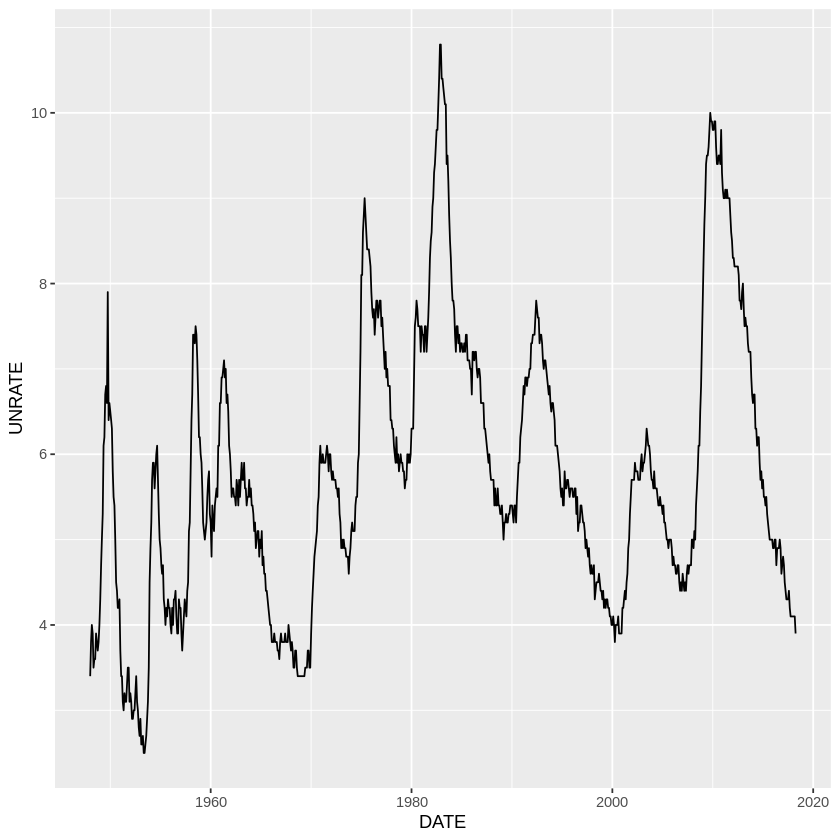

In [35]:
unemp |> ggplot(aes(DATE, UNRATE)) + geom_line()

In [23]:
# generate a dataset where data is randomly missing
rand.unemp.idx <- sample(1:nrow(unemp), .1*nrow(unemp))
rand.unemp <- unemp[-rand.unemp.idx]

# more missing data when unemployment is high
high.unemp.idx <- which(unemp$UNRATE > 8)
num.to.select <- .2 * length(high.unemp.idx)
high.unemp.idx <- sample(high.unemp.idx,)
bias.unemp <- unemp[-high.unemp.idx]

### Imputation

Imputation in the context of time series involves filling in missing values using the patterns or trends observed in the entire series. For example:

* **Mean Imputation**: Replacing missing values with the mean of the entire time series.

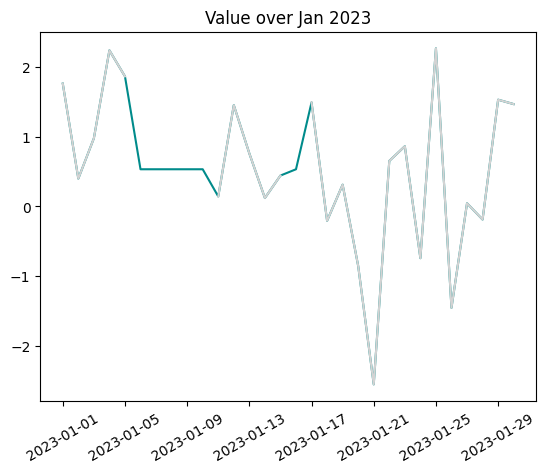

In [ ]:
# Mean Imputation
df_mean_imputed = df.copy()
df_mean_imputed['value'] = df_mean_imputed['value'].fillna(df_mean_imputed['value'].mean())
plot_missing(df_mean_imputed)


- **Median Imputation:** Using the median value of the series to fill in gaps.

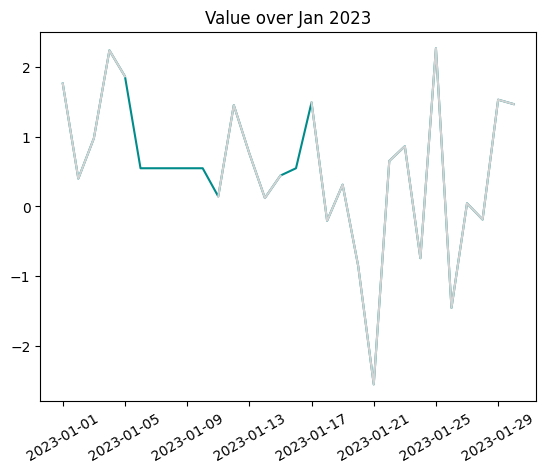

In [ ]:
# Median Imputation
df_median_imputed = df.copy()
median_value = df_median_imputed['value'].median()
df_median_imputed['value'].fillna(median_value, inplace=True)
plot_missing(df_median_imputed)

- **Forward Fill:** Replacing missing values with the last observed value before the gap.

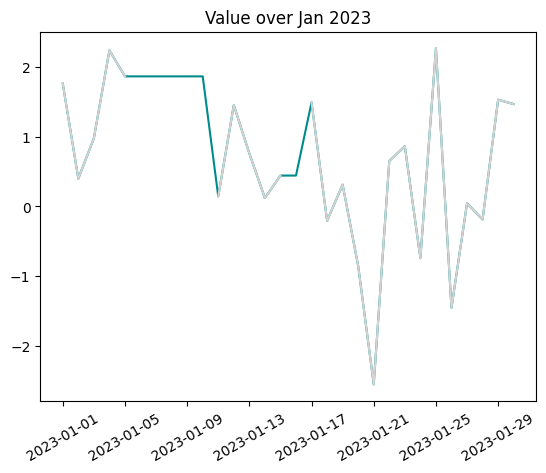

In [ ]:
# Forward Fill
df_ffill = df.copy()
df_ffill['value'] = df_ffill['value'].ffill()
plot_missing(df_ffill)

- **Backward Fill:** Replacing missing values with the next observed value after the gap.


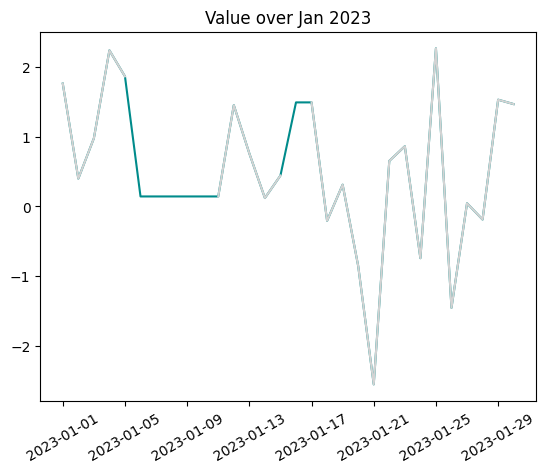

In [ ]:
  # Backward Fill
df_bfill = df.copy()
df_bfill['value'] = df_bfill['value'].bfill()
plot_missing(df_bfill)

* **Moving Average**: Moving average imputation is a method used to fill missing values in time series data by replacing them with the average of a specified number of preceding and succeeding data points. It's a simple and effective method for handling missing values when the underlying assumption is that the data is relatively smooth and without significant trends or seasonality.

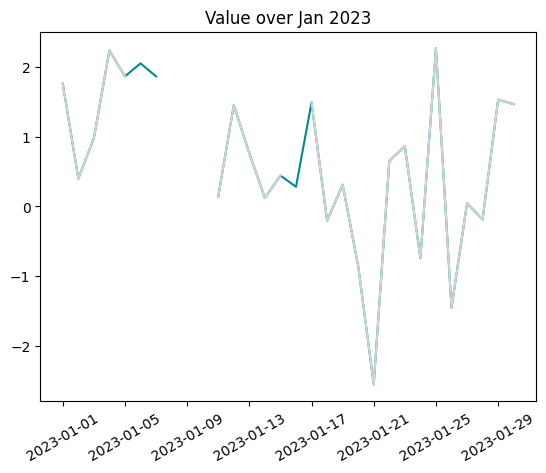

In [ ]:
# Function to perform moving average imputation
def moving_average_imputation(df, window_size):
  """
  Imputes missing values in a DataFrame using moving average.

  Args:
    df: DataFrame containing the time series data.
    window_size: Size of the moving average window.

  Returns:
    DataFrame with missing values imputed.
  """

  df_imputed = df.copy()
  df_imputed.fillna(df.rolling(window=window_size, min_periods=1).mean(), inplace=True)
  return df_imputed

# Apply moving average imputation with a window size of 3
df_imputed = moving_average_imputation(df, window_size=3)
plot_missing(df_imputed)

### Interpolation

Interpolation in time series is about estimating the missing value based on the values before and after the missing point. This method makes use of the temporal order of the data:

- **Linear Interpolation:** If the temperature readings for day 1 and day 3 are known but day 2 is missing, you can draw a straight line between the values of day 1 and day 3 and estimate day 2.



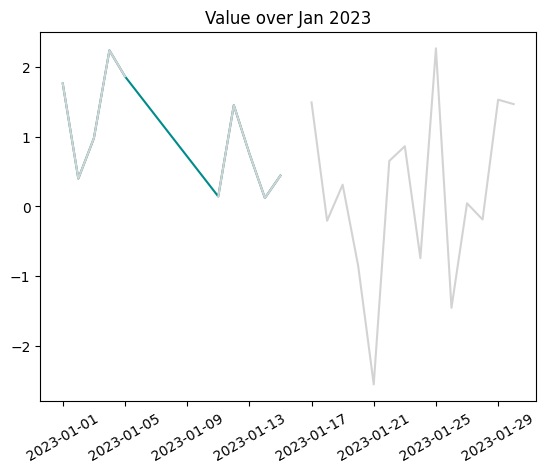

In [ ]:
# Linear Interpolation
df_linear_interp = df.copy()
df_linear_interp['value'].interpolate(method='linear', inplace=True)

plot_missing(df_linear_interp.head(15))


- **Polynomial Interpolation:** If the time series shows a pattern, like a curve, a polynomial function can be used to better estimate the missing values.



- **Spline Interpolation:** Using piecewise polynomials to fit the data, which can be smoother than simple linear interpolation.    

> **Note:**
>
> - For polynomial interpolation, the `order` parameter determines the degree of the polynomial. Higher orders can fit complex patterns but also risk overfitting.
> - For spline interpolation, the `kind` parameter specifies the type of spline. Cubic splines are often a good default choice.



### Deletion of affected time periods

In time series, deleting affected time periods means removing entire time points or intervals where data is missing. This can be done in a couple of ways:

- **Listwise Deletion:** If any data point in a particular time period is missing, you remove that entire time period. For example, if any value is missing in a daily record, you might remove that whole day’s data.
    

- **Specific Period Deletion:** If there's a continuous block of missing data, you might remove that entire block. For instance, if data for an entire week is missing, you might exclude that week from analysis.

### Final Notes:

- It is impossible to prove that data is truly missing at random, and it is unlikely that missingness is truly random in most real-world occurrences.
- Sometimes the probability that a measurement is missing is explainable by the variables you have measured, but sometimes not. Wide data sets with many features are the best way to investigate possible explanations for patterns of missing data, but these are not the norm for time series analysis.
- When you need to understand the uncertainty introduced by imputing values to missing data, you should run through a variety of scenarios and also speak to as many people involved in the data collection process as possible.
- How you handle missing data should account for your downstream use of that data. You must guard carefully against lookaheads or decide how seriously a lookahead will affect the validity of your subsequent work.